In [0]:
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import random
import statistics
import matplotlib.pyplot as plt


import pandas as pd
import io
import requests
import warnings
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten

warnings.filterwarnings("ignore")    

## Keras MLPClassifier

In [0]:
#url="https://raw.githubusercontent.com/atfrank/CS-Annotate/master/data/train_features.csv"
url = "https://raw.githubusercontent.com/atfrank/CS-Annotate/Kexin/data/train_features_3.csv"
s=requests.get(url).content
training_X = pd.read_csv(io.StringIO(s.decode('utf-8')), sep = ' ')
trainX = training_X.values

#url = "https://raw.githubusercontent.com/atfrank/CS-Annotate/master/data/train_target.csv"
url = "https://raw.githubusercontent.com/atfrank/CS-Annotate/Kexin/data/train_target_3.csv"
s=requests.get(url).content
training_y = pd.read_csv(io.StringIO(s.decode('utf-8')), sep = ' ')

#url="https://raw.githubusercontent.com/atfrank/CS-Annotate/master/data/test_features.csv"
url = "https://raw.githubusercontent.com/atfrank/CS-Annotate/Kexin/data/test_features_3.csv"
s=requests.get(url).content
testing_X = pd.read_csv(io.StringIO(s.decode('utf-8')), sep = ' ')
testX = testing_X.values

#url = "https://raw.githubusercontent.com/atfrank/CS-Annotate/master/data/test_target.csv"
url = "https://raw.githubusercontent.com/atfrank/CS-Annotate/Kexin/data/test_target_3.csv"
s=requests.get(url).content
testing_y = pd.read_csv(io.StringIO(s.decode('utf-8')), sep = ' ')

Structural Feature - f1 score
astack - 0.8348764566148551
nastack - 0.8623079134145534
pair - 0.7847913167075848
pucker_C1p_exo - 0.98944906186234
pucker_C2p_endo - 0.9526675987296325
pucker_C2p_exo - 0.8613458528951488
pucker_C3p_endo - 0.7504795545516115
pucker_C3p_exo - 0.9646367413111764
pucker_C4p_exo - 0.9631132051701983
sasa - 0.850354254646983
syn_anti - 0.957434135498914


<Figure size 432x288 with 0 Axes>

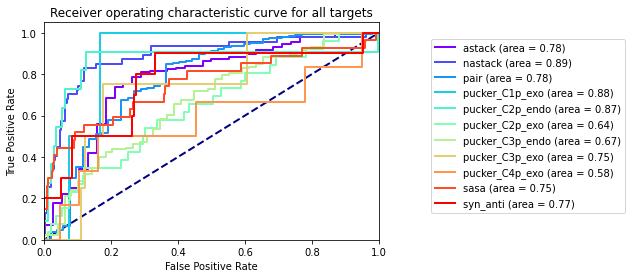

In [6]:
feature_list = ['astack','nastack','pair','pucker_C1p_exo','pucker_C2p_endo','pucker_C2p_exo','pucker_C3p_endo','pucker_C3p_exo','pucker_C4p_exo','sasa','syn_anti']

import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))

i=0
plt.figure()
lw = 2
__, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

print("Structural Feature - f1 score")
for structural_feature in feature_list:
  training_y_struct = training_y[[structural_feature]]
  trainy = training_y_struct.values

  testing_y_struct = testing_y[[structural_feature]]
  testy = testing_y_struct.values
  # setup scaler
  temp = list()
  scaler = StandardScaler()
  scaler.fit(trainX)

  # transform input
  trainX_scaled = scaler.transform(trainX)
  testX_scaled = scaler.transform(testX)

  clf = MLPClassifier(hidden_layer_sizes=(50,100,50), max_iter=100, activation = 'logistic', learning_rate = 'invscaling', validation_fraction = 0.2)

  clf.fit(trainX_scaled, np.int_(trainy))
  y_true, y_pred, y_pred_2 = np.int_(testy) , clf.predict(testX_scaled), clf.predict_proba(testX_scaled)
  y_pred_2 = np.array([(y_pred_2[i][0]*0+y_pred_2[i][1]*1) for i in range(len(y_pred_2))])
  y_true = np.array([y_true[i][0] for i in range(len(y_true))])
  report = classification_report(y_true, y_pred, output_dict=True)
  temp.append(report['weighted avg']['f1-score'])

  AUC = sklearn.metrics.roc_auc_score(y_true, y_pred_2, average = 'weighted')
  fpr,tpr,thresholds = sklearn.metrics.roc_curve(y_true, y_pred_2, pos_label = 1)
  
  ax.plot(fpr, tpr, color=colors[i],
          lw=lw, label=f'{structural_feature} (area = %0.2f)' % AUC)
  
  print(structural_feature,'-' ,report['weighted avg']['f1-score'])
  i+=1

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve for all targets')
plt.legend(loc="lower right", bbox_to_anchor=(1.75, 0.1))
plt.show()